# Mod 5 Final Project

### Overview:
Santader is a Spanish bank and one of the biggest banks in the world with more than 125 million customers. In our project we are analyzing our spanish customers and their behaviors within a year range. We will first analyze the data and extract meaning from and categorize to understand how Santander bank is being used by individuals. Afterwards we will train a model which better understands user and what potential product he/she has and what he/she is might be interested in. With this model we can better guide our potential customers with our services saving them time and also offer some of our product to our already existing customers.

### Outline:
Import neccessary packages and dataset
Explore data
Run Models
Conclusion

## Load libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from shuyu import *
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import tree

In [2]:
# Import the data
%time df = pd.read_csv('train_ver2.csv',parse_dates=['fecha_dato','fecha_alta'])
df.head()

<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 59.2 s, sys: 22.7 s, total: 1min 21s
Wall time: 1min 28s


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [4]:
display_all(df.head(5))

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## Data cleaning

In [5]:
df = df.rename({'fecha_dato':'date','ncodpers':'customerid','ind_empleado':'employee_index','pais_residencia':'country_residence',
                'sexo':'gender','age':'age','fecha_alta':'date_of_first_holder_contract','ind_nuevo':'new_customer_index','antiguedad':'customer_seniority',
                'indrel':'primary_or_not','ult_fec_cli_1t':'last_date_as_primary_customer','indrel_1mes':'customer_type_at_beginning_of_month',
                'tiprel_1mes':'customer_relation_at_beginning_of_month', 'indresi':'residence_index','indext':'foreigner_index','conyuemp':'spouse',
                'canal_entrada':'channel','indfall':'decreased_index','tipodom':'address_type','cod_prov':'province_code','nomprov':'province_name',
                'ind_actividad_cliente':'active_or_not','renta':'gross_income','segmento':'segmentation','ind_ahor_fin_ult1':'saving_account',
                'ind_aval_fin_ult1':'guarantees','ind_cco_fin_ult1':'current_accounts','ind_cder_fin_ult1':'derivada_accounts','ind_cno_fin_ult1':'payroll_accounts',
                'ind_ctju_fin_ult1':'junior_accounts','ind_ctma_fin_ult1':'mas_particular_accounts','ind_ctop_fin_ult1':'particular_accounts',
                'ind_ctpp_fin_ult1':'particular_plus','ind_deco_fin_ult1':'short_term_deposits','ind_deme_fin_ult1':'medium_term_deposits',
                'ind_dela_fin_ult1':'long_term_deposits','ind_ecue_fin_ult1':'e_account','ind_fond_fin_ult1':'funds','ind_hip_fin_ult1':'mortgage',
                'ind_plan_fin_ult1':'pensions_plan','ind_pres_fin_ult1':'loans','ind_reca_fin_ult1':'tax','ind_tjcr_fin_ult1':'credit_card','ind_valo_fin_ult1':'securities',
                'ind_viv_fin_ult1':'home_account','ind_nomina_ult1':'payroll','ind_nom_pens_ult1':'pensions','ind_recibo_ult1':'direct_debit'},axis=1)

In [7]:
df.isnull().sum()

date                                              0
customerid                                        0
employee_index                                27734
country_residence                             27734
gender                                        27804
age                                               0
date_of_first_holder_contract                 27734
new_customer_index                            27734
customer_seniority                                0
primary_or_not                                27734
last_date_as_primary_customer              13622516
customer_type_at_beginning_of_month          149781
customer_relation_at_beginning_of_month      149781
residence_index                               27734
foreigner_index                               27734
spouse                                     13645501
channel                                      186126
decreased_index                               27734
address_type                                  27735
province_cod

In [8]:
df = df.drop(['spouse','last_date_as_primary_customer'], axis=1)

In [9]:
df.dropna(inplace=True)

In [12]:
cat_var=[]
for column in df:
    if df[column].dtype=='object':
        cat_var.append(column)

In [13]:
cat_var.remove('age')

In [14]:
df['age']=df['age'].astype(int)

In [15]:
train_cats(df)

In [16]:
for i in cat_var:
    df[i] = df[i].cat.codes

In [17]:
df.dtypes

date                                       datetime64[ns]
customerid                                          int64
employee_index                                       int8
country_residence                                    int8
gender                                               int8
age                                                 int64
date_of_first_holder_contract              datetime64[ns]
new_customer_index                                float64
customer_seniority                                  int16
primary_or_not                                    float64
customer_type_at_beginning_of_month                  int8
customer_relation_at_beginning_of_month              int8
residence_index                                      int8
foreigner_index                                      int8
channel                                             int16
decreased_index                                      int8
address_type                                      float64
province_code 

In [18]:
df.isnull().sum()

date                                       0
customerid                                 0
employee_index                             0
country_residence                          0
gender                                     0
age                                        0
date_of_first_holder_contract              0
new_customer_index                         0
customer_seniority                         0
primary_or_not                             0
customer_type_at_beginning_of_month        0
customer_relation_at_beginning_of_month    0
residence_index                            0
foreigner_index                            0
channel                                    0
decreased_index                            0
address_type                               0
province_code                              0
province_name                              0
active_or_not                              0
gross_income                               0
segmentation                               0
saving_acc

## Save and load csv file

In [252]:
df.to_csv('preprocessed_train.csv')

In [19]:
clean_df = pd.read_csv('preprocessed_train.csv')

In [20]:
clean_df.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
display_all(clean_df.head())

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,customer_type_at_beginning_of_month,customer_relation_at_beginning_of_month,residence_index,foreigner_index,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,3,2,0,35,2015-01-12,0.0,263,1.0,0,0,1,0,150,0,1.0,29.0,31,1.0,87218.10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,1,147,0,1.0,13.0,16,0.0,35548.74,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,13.0,16,0.0,122179.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,3,2,0,22,2012-08-10,0.0,292,1.0,0,1,1,0,146,0,1.0,50.0,51,0.0,119775.54,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050615,3,2,0,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,45.0,47,0.0,22220.04,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## EDA

### Data Understanding
Our dataset is from Santander bank over 1.5 year of customer transactions starts at 2015-01-28 and the columns after ind_(xyz)_ult1 #25 is what customers buy and we will predict what will they buy after May 2016 for our test dataset. For our training dataset we have approximately 13m data points and for test set we have 92 thousand data points.

### Notes
We have dropped the dataset to 10M rows after preprocessing
We can see that most of our predictors are categorical data so it is not a good practice to reduce dimensionality with PCA

## Plot relationship between age and product selection

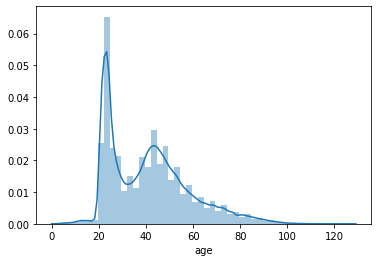

In [32]:
sns.distplot(clean_df.age)

In [33]:
df_age = (clean_df.groupby(pd.cut(clean_df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [34]:
df_age = df_age.loc[:,'saving_account':'direct_debit']

In [35]:
df_age = df_age.T

In [36]:
df_age

age,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
saving_account,0.0,11.0,1133.0,105.0,0.0,0.0
guarantees,0.0,77.0,200.0,17.0,0.0,0.0
current_accounts,4803.0,3984462.0,2237956.0,681241.0,170330.0,5528.0
derivada_accounts,0.0,523.0,3068.0,800.0,153.0,0.0
payroll_accounts,5.0,325273.0,531066.0,84784.0,11693.0,72.0
junior_accounts,110359.0,1129.0,0.0,0.0,0.0,0.0
mas_particular_accounts,1.0,33818.0,50225.0,13108.0,2636.0,6.0
particular_accounts,6.0,157443.0,893704.0,321193.0,116857.0,5408.0
particular_plus,0.0,87648.0,332193.0,73800.0,14744.0,310.0
short_term_deposits,0.0,4720.0,10000.0,2615.0,633.0,0.0


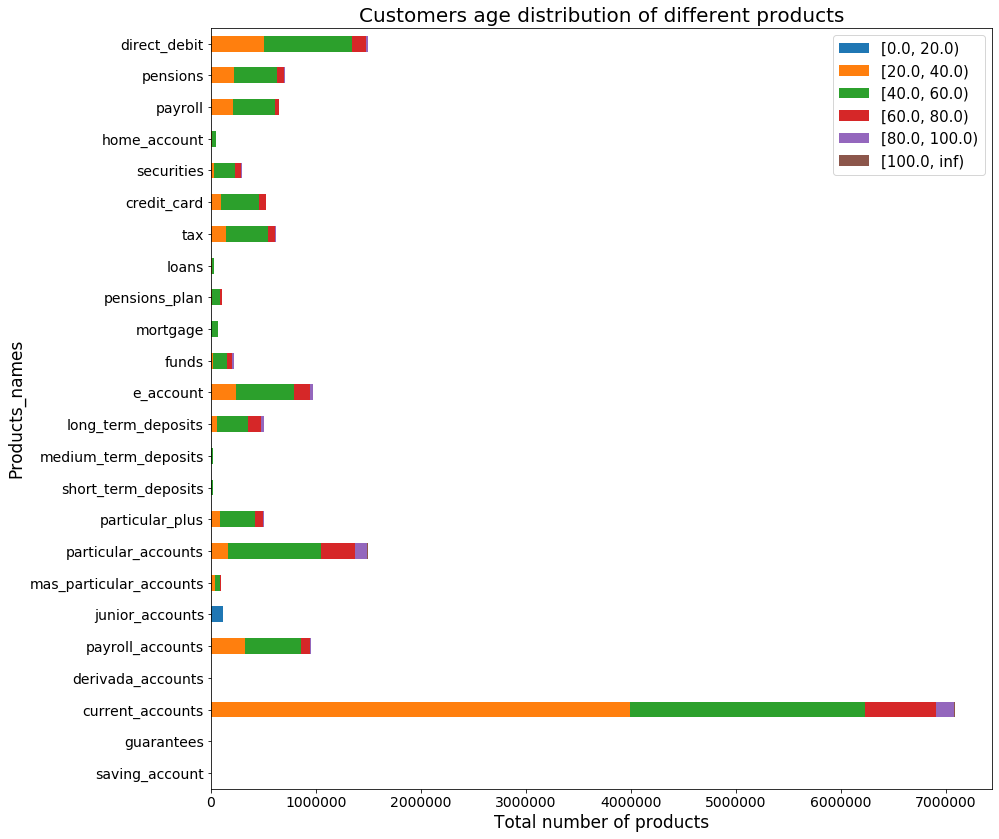

In [37]:
df_age.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Customers age distribution of different products', fontsize=20) 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

## Plot relationship between gross income and product selection

In [38]:
max(clean_df.gross_income)

28894395.51

In [39]:
min(clean_df.gross_income)

1202.73

In [40]:
for i in range(0,100):
    q = i/100
    if (i%20 == 0):
        print("{} percentile: {}".format(i, clean_df.gross_income.quantile(q=q)))


0 percentile: 1202.73
20 percentile: 62567.4
40 percentile: 87438.0
60 percentile: 119071.56
80 percentile: 174474.51


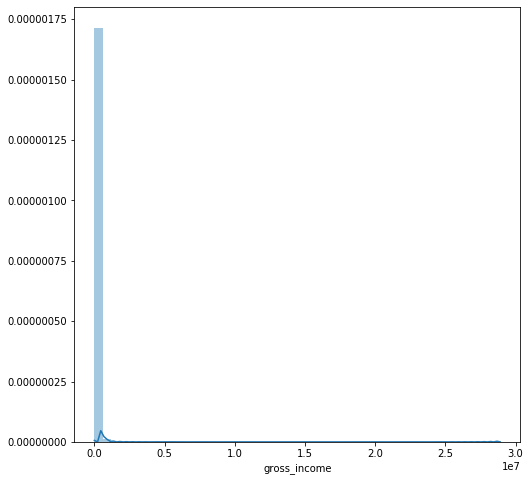

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(clean_df.gross_income)

In [42]:
df_income = (clean_df.groupby(pd.cut(clean_df['gross_income'], [1202,62567,87438,119072,174475, pd.np.inf], right=False))
                     .sum())

In [43]:
df_income = df_income.loc[:,'saving_account':'direct_debit']

In [44]:
df_income = df_income.T

In [45]:
df_income

gross_income,"[1202.0, 62567.0)","[62567.0, 87438.0)","[87438.0, 119072.0)","[119072.0, 174475.0)","[174475.0, inf)"
saving_account,125.0,91.0,139.0,356.0,538.0
guarantees,23.0,14.0,29.0,49.0,179.0
current_accounts,1502687.0,1467430.0,1427348.0,1367883.0,1318972.0
derivada_accounts,653.0,652.0,760.0,1086.0,1393.0
payroll_accounts,145633.0,164707.0,191040.0,220756.0,230757.0
junior_accounts,11138.0,14520.0,22671.0,29993.0,33166.0
mas_particular_accounts,15422.0,17933.0,20611.0,22664.0,23164.0
particular_accounts,186965.0,239378.0,286192.0,359385.0,422691.0
particular_plus,57486.0,81461.0,99846.0,124165.0,145737.0
short_term_deposits,3026.0,3406.0,3916.0,4114.0,3506.0


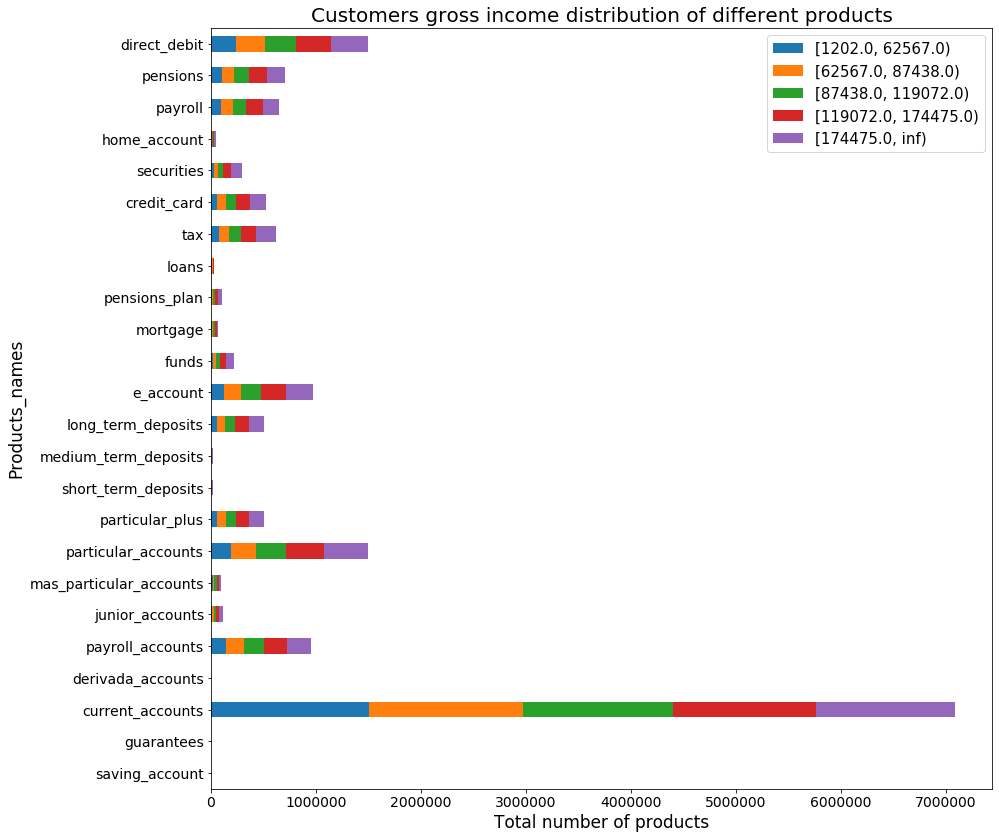

In [46]:
df_income.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Customers gross income distribution of different products', fontsize=20) 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

## Plot relationship between customer seniority and product selection

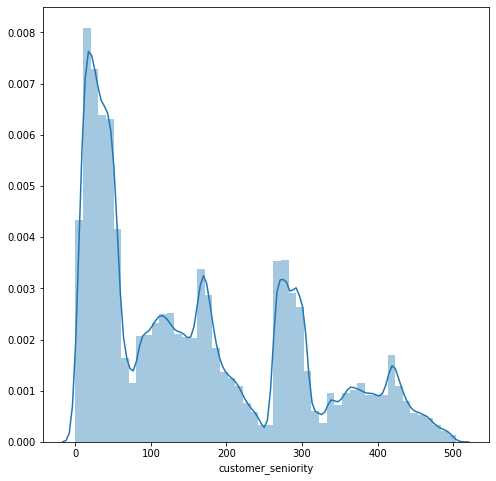

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(clean_df.customer_seniority)

In [48]:
for i in range(0,100):
    q = i/100
    if (i%20 == 0):
        print("{} percentile: {}".format(i, clean_df.customer_seniority.quantile(q=q)))


0 percentile: 0.0
20 percentile: 31.0
40 percentile: 83.0
60 percentile: 169.0
80 percentile: 290.0


In [49]:
df_seniority = (clean_df.groupby(pd.cut(clean_df['customer_seniority'], [0,31,83,169,290, pd.np.inf], right=False))
                     .sum())

In [50]:
df_seniority = df_seniority.loc[:,'saving_account':'direct_debit'].T

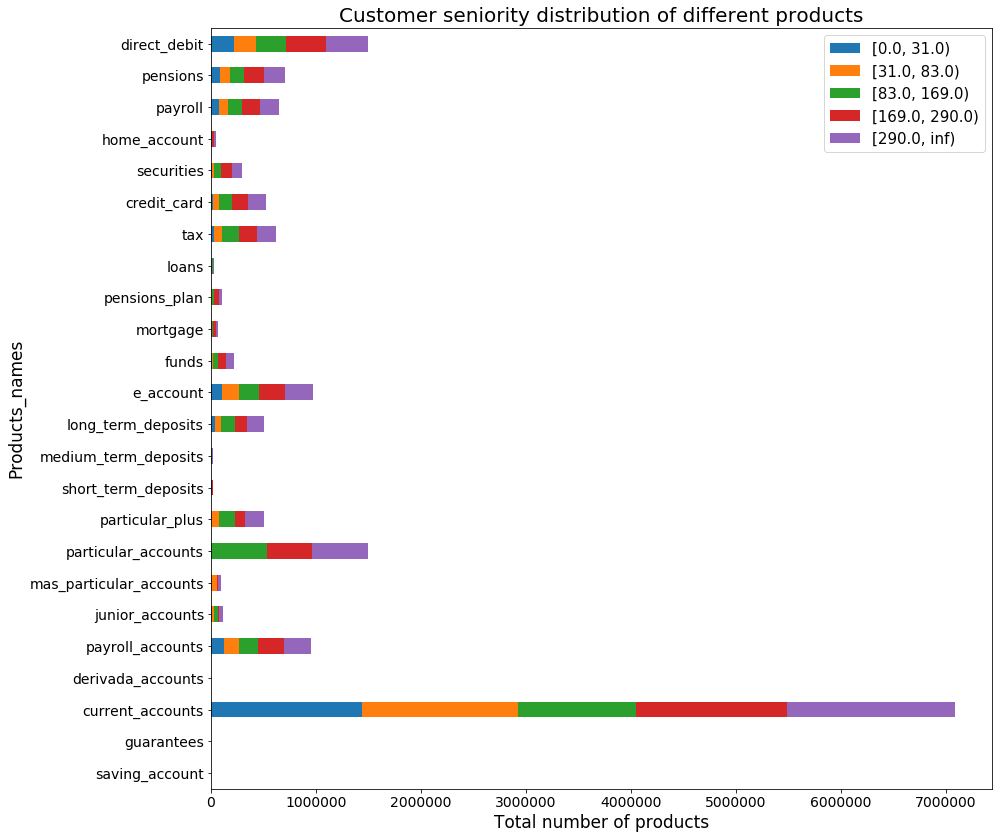

In [51]:
df_seniority.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Customer seniority distribution of different products', fontsize=20) 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [52]:
clean_df.customerid.nunique()

707413

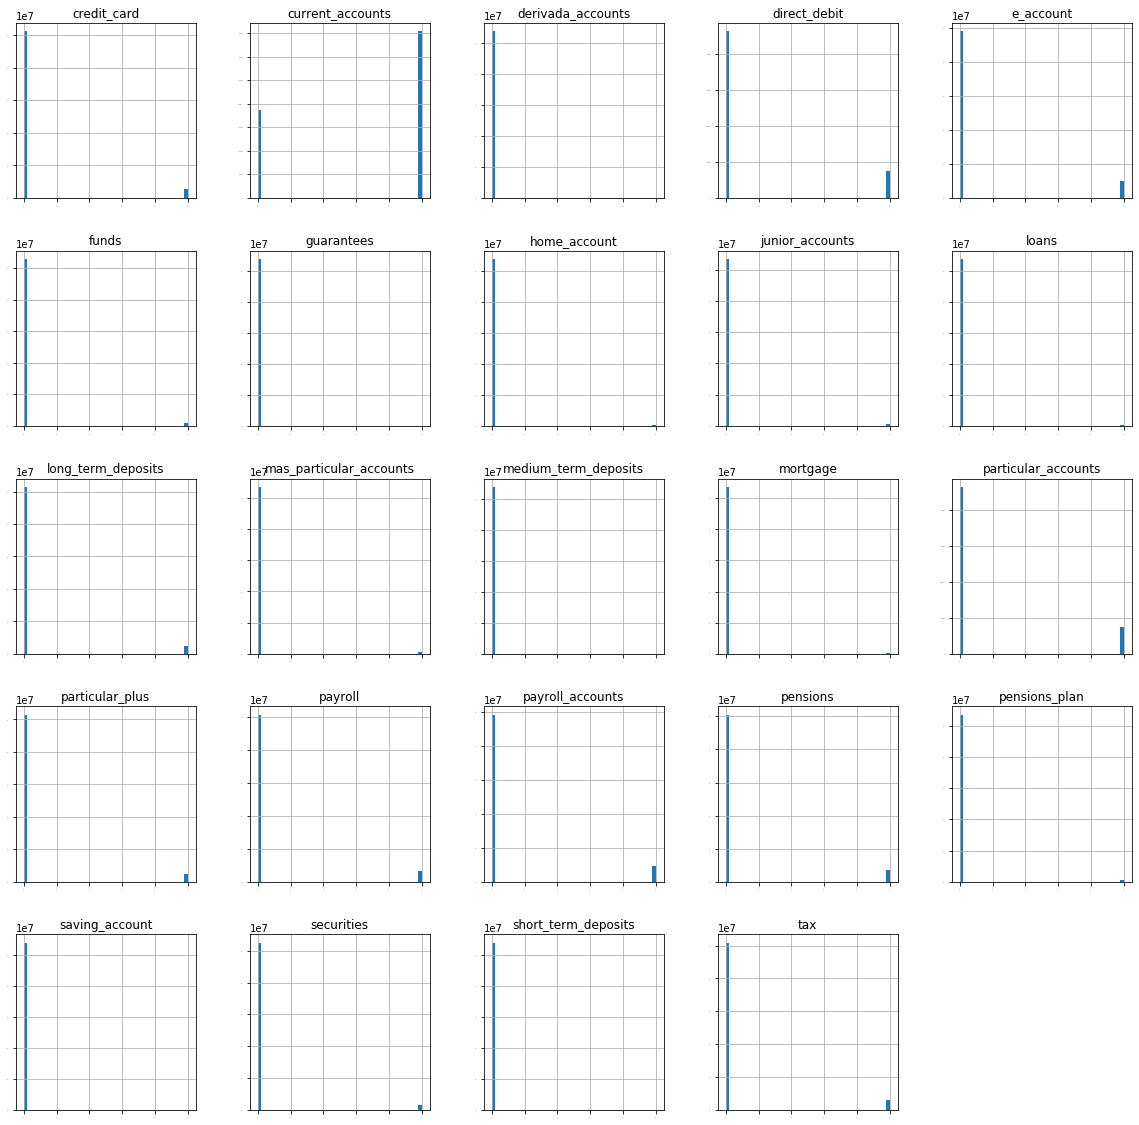

In [53]:
%matplotlib inline
ax = target.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,20))

In [26]:
target_q1 = target.current_accounts

In [23]:
target_q1.value_counts()

1    7084320
0    3711072
Name: current_accounts, dtype: int64

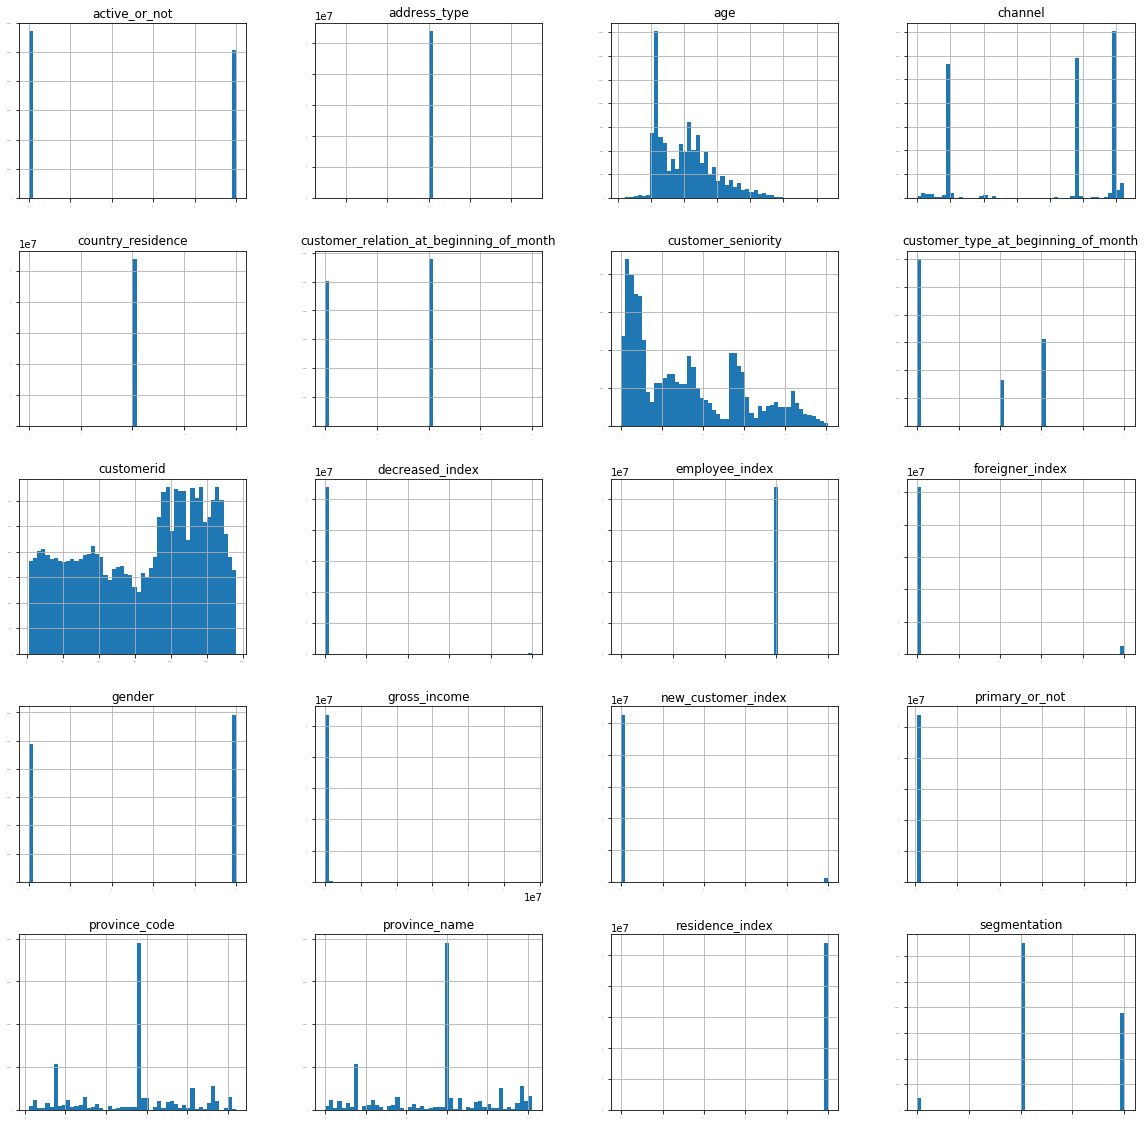

In [57]:
ax = predictors.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,20))

## Feature engineering and selection

In [33]:
# def print_corr(df, pct=0):
    
#     sns.set(style="white")

#     # Compute the correlation matrix
#     if pct == 0:
#         corr = df.corr()
#     else:
#         corr = abs(df.corr()) > pct

#     # Generate a mask for the upper triangle
#     mask = np.zeros_like(corr, dtype=np.bool)
#     mask[np.triu_indices_from(mask)] = True

#     # Set up the matplotlib figure
#     f, ax = plt.subplots(figsize=(11, 9))

#     # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)

#     # Draw the heatmap with the mask and correct aspect ratio
#     sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

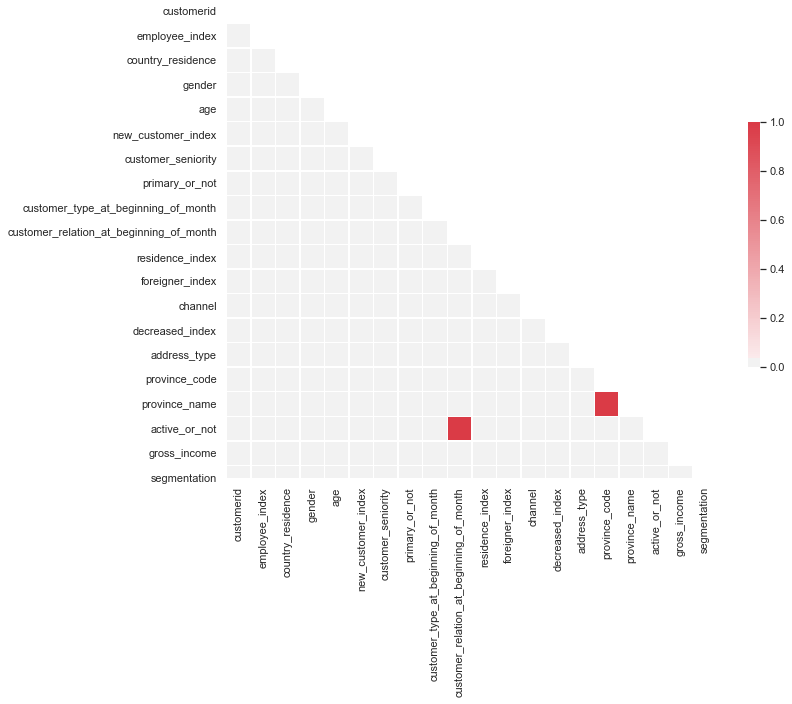

In [64]:
print_corr(predictors, pct=0.75)

PCA Preproceess: Transformation of dateetime to timestamp

In [27]:
predictors.drop(['customer_relation_at_beginning_of_month','province_code'],axis=1,inplace=True)

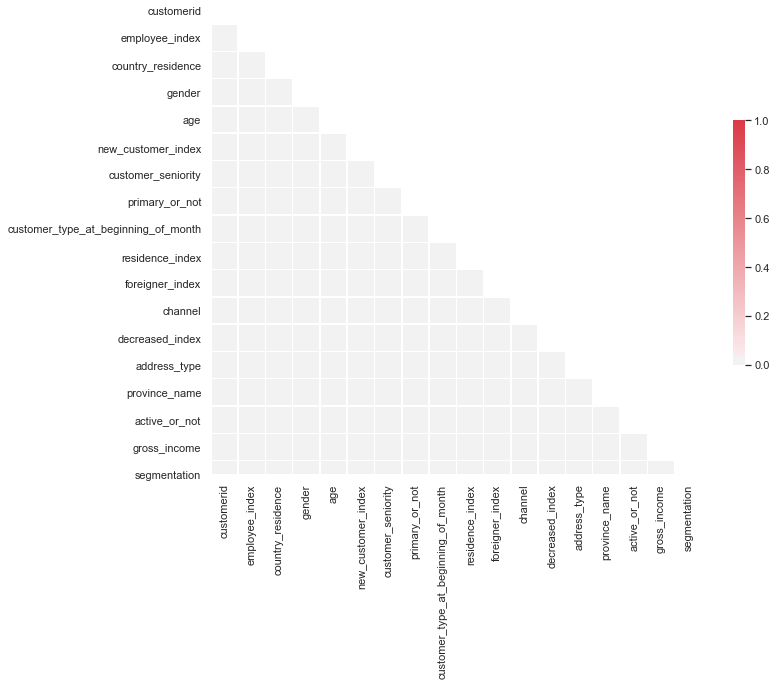

In [34]:
print_corr(predictors, pct=0.75)

In [83]:
predictors['date2'] = pd.DatetimeIndex(predictors['date_of_first_holder_contract']).asi8

In [84]:
predictors['date2']

0           1421020800000000000
1           1344556800000000000
2           1344556800000000000
3           1344556800000000000
4           1344556800000000000
                   ...         
10795387    1376438400000000000
10795388    1376438400000000000
10795389    1376438400000000000
10795390    1376438400000000000
10795391    1376438400000000000
Name: date2, Length: 10795392, dtype: int64

In [86]:
predictors['date1'] = pd.DatetimeIndex(predictors['date']).asi8

In [87]:
predictors['date1']

0           1422403200000000000
1           1422403200000000000
2           1422403200000000000
3           1422403200000000000
4           1422403200000000000
                   ...         
10795387    1464393600000000000
10795388    1464393600000000000
10795389    1464393600000000000
10795390    1464393600000000000
10795391    1464393600000000000
Name: date1, Length: 10795392, dtype: int64

In [89]:
transformed_predictors = predictors.drop(['date_of_first_holder_contract','date'],axis=1)

Use PCA to downscale your features. Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [91]:
pca_1 = PCA(n_components=5)
pca_2 = PCA(n_components=10)
pca_3 = PCA(n_components=15)

principalComponents = pca_1.fit_transform(transformed_predictors)
principalComponents = pca_2.fit_transform(transformed_predictors)
principalComponents = pca_3.fit_transform(transformed_predictors)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=18)
principalComponents = pca.fit_transform(transformed_predictors)
print(np.sum(pca.explained_variance_ratio_))

0.9999999999999928
1.0000000000000067
1.0000000000000047
1.0


52511